Explotary Data Analysis (EDA) - Webtoon and Manhwa Dataset


In this notebook we are going to explore the data to have a better understanding about how we can use the dataset.


Goals:
1. To understand the structure  and quality of the dataset.
2. To visualize the distribution of the data in terms of year and rating

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import ast

In [80]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [81]:
try:
    df = pd.read_csv(r"C:\Users\aleyna nur\Desktop\Manga_Manhwa_Manhua_Rec\datasets\raw\data.csv")

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

In [82]:
df.head()

,title,description,rating,year,tags,cover
0,Salad Days (Tang LiuZang) - Part 2,The second season of Salad Days (Tang LiuZang).,4.7,2021.0,"['BL', 'Manhua', 'Romance', 'Shounen-ai', 'Spo...",https://cdn.anime-planet.com/manga/primary/sal...
1,The Master of Diabolism,As the grandmaster who founded the Demonic Sec...,4.7,2017.0,"['Action', 'Adventure', 'BL', 'Comedy', 'Manhu...",https://cdn.anime-planet.com/manga/primary/the...
2,JoJo's Bizarre Adventure Part 7: Steel Ball Run,"Set in 1890, Steel Ball Run spotlights Gyro Ze...",4.7,2004.0,"['Action', 'Adventure', 'Horror', 'Mystery', '...",https://cdn.anime-planet.com/manga/primary/joj...
3,A Sign of Affection,"Yuki is a typical college student, whose world...",4.7,2019.0,"['Romance', 'Shoujo', 'Slice of Life', 'Disabi...",https://cdn.anime-planet.com/manga/primary/a-s...
4,Moriarty the Patriot,"Before he was Sherlock’s rival, Moriarty fough...",4.7,2016.0,"['Mystery', 'Shounen', 'Detectives', 'England'...",https://cdn.anime-planet.com/manga/primary/mor...


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70948 entries, 0 to 70947
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        70948 non-null  object 
 1   description  70917 non-null  object 
 2   rating       29871 non-null  float64
 3   year         70124 non-null  float64
 4   tags         70948 non-null  object 
 5   cover        70948 non-null  object 
dtypes: float64(2), object(4)
memory usage: 3.2+ MB


Checking missing and duplicate values

In [84]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 title              0
description       31
rating         41077
year             824
tags               0
cover              0
dtype: int64


I checked some parts of the dataset and saw some descriptions written as "This entry currently doesn't have a synopsis. Check back soon!". This description also means that value is missing so we will be changing this value to nan

In [85]:
df.loc[df["description"] == "This entry currently doesn't have a synopsis. Check back soon!", "description"] = np.nan

In [86]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [87]:
df["year"] = pd.to_numeric(df["year"], errors='coerce')

Rating Distribution

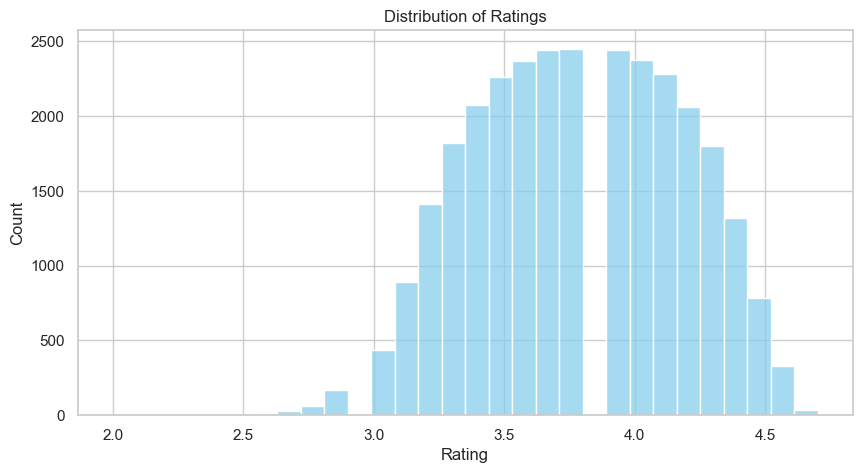

In [88]:
plt.figure(figsize = (10, 5))
sns.histplot(df['rating'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Year Distribution

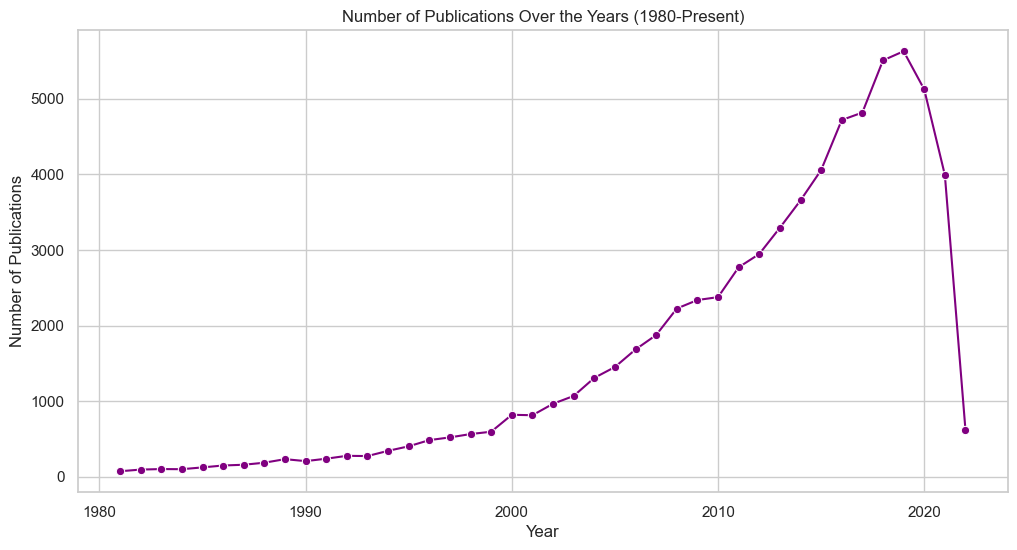

In [89]:
plt.figure(figsize=(12, 6))

year_counts = df[df['year'] > 1980]["year"].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color = "purple")
plt.title("Number of Publications Over the Years (1980-Present)")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.show()

Content Analysis (Tags and Comic Type)

In [90]:
df['tags'] = df['tags'].apply(ast.literal_eval)

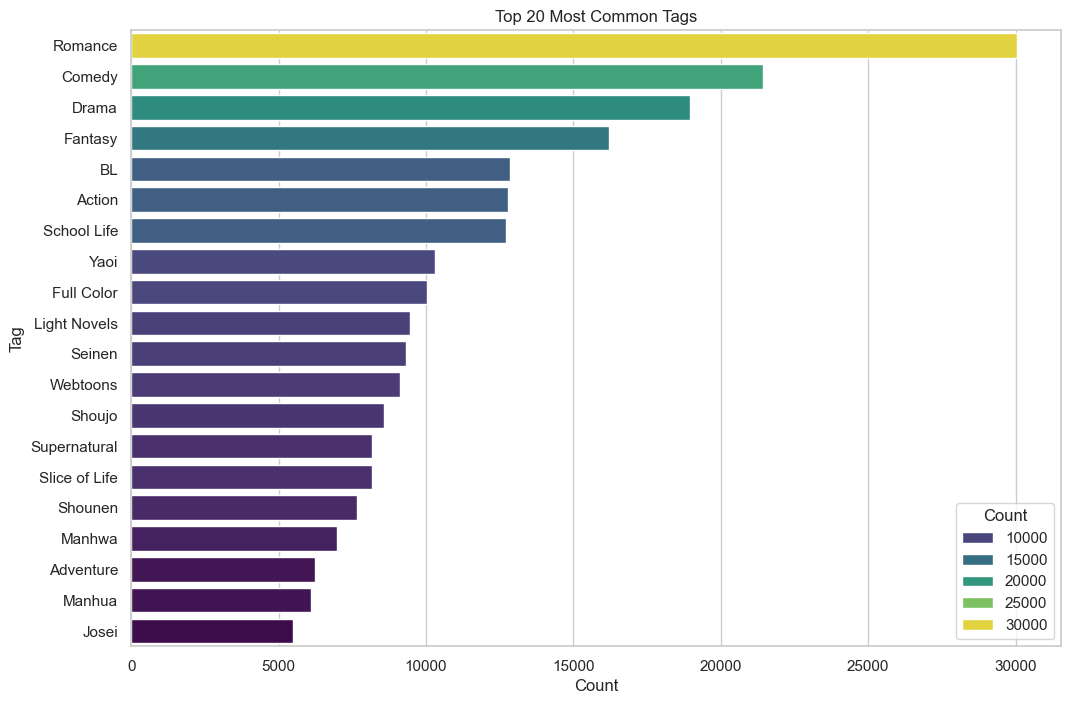

In [92]:
tag_list = []

for tag in  df['tags'].dropna():
    tag_list.extend(tag)

tag_counts = Counter(tag_list).most_common(20)
tags_df = pd.DataFrame(tag_counts, columns=['Tag', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(y='Tag', x='Count', data=tags_df, palette='viridis', hue='Count')
plt.title('Top 20 Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

In [93]:
top_10_tags = [tag[0] for tag in tag_counts[:10]]

In [96]:
tag_ratings = {}

for tag in top_10_tags:
    mean_rating = df[df['tags'].apply(
    lambda x: tag.lower() in [t.lower() for t in x] if isinstance(x, (list, tuple, set)) else tag.lower() in str(x).lower()
)]['rating'].mean()
    tag_ratings[tag] = mean_rating

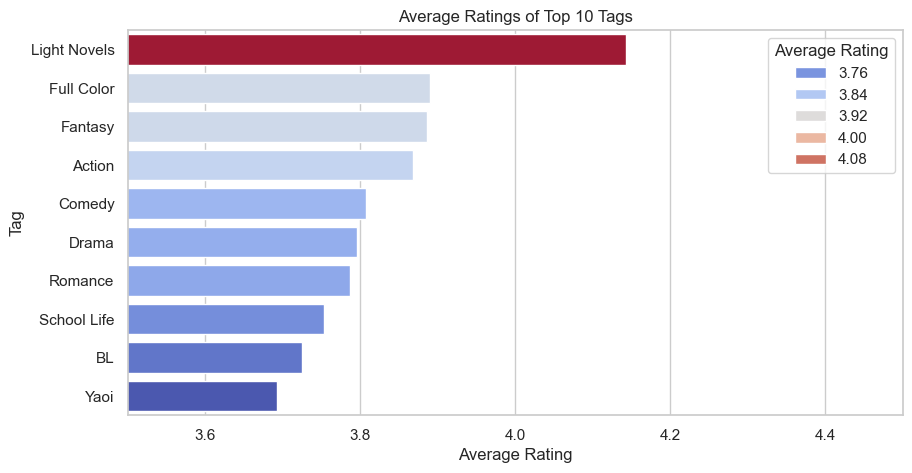

In [99]:
tag_rating_df = pd.DataFrame(list(tag_ratings.items()), columns=['Tag', 'Average Rating']).sort_values(by='Average Rating', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y='Tag', x='Average Rating', data=tag_rating_df, palette='coolwarm', hue='Average Rating')
plt.xlim(3.5, 4.5)
plt.title('Average Ratings of Top 10 Tags')
plt.xlabel('Average Rating')
plt.ylabel('Tag')
plt.show()